## An example geography with two islands

In [38]:
import matplotlib.pyplot as plt
import torch
from tspyro.diffusion import make_hex_grid

In [39]:
bounds = dict(west=-2.0, east=2.0, south=-1.0, north=1.0)
island_center = [(-1.0, 0.0), (1.0, 0.0)]
island_radius = [0.99, 0.99]
grid_radius = 0.1

def on_land(x, y):
    result = torch.tensor(False)
    for (x0, y0), r in zip(island_center, island_radius):
        result = result | (r > (x - x0) ** 2 + (y - y0) ** 2)
    return result

In [40]:
grid = make_hex_grid(**bounds, radius=grid_radius, predicate=on_land)
waypoints = grid["waypoints"]
transition = grid["transition"]

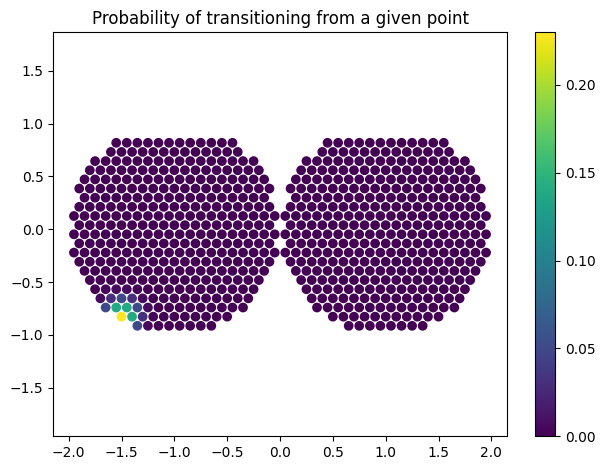

In [41]:
plt.title("Probability of transitioning from a given point")
plt.scatter(waypoints[:, 0], waypoints[:, 1], c=transition[0])
plt.xlim(bounds["west"], bounds["east"])
plt.ylim(bounds["south"], bounds["north"])
plt.axis("equal")
plt.colorbar()
plt.tight_layout()